In [1]:
!pip install control
from control.matlab import *


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp


In [8]:
Ac = np.array([[0, 1], [-1, -1]]) 
Bc = np.array([[0], [1]])
Cc = np.array([[1, 0]])
Dc = np.array([0])
sysc = ss(Ac, Bc, Cc, Dc) # 連続時間状態方程式
st = 0.05 # サンプリング周期 
sys = c2d(sysc,st) # 離散化

In [9]:
A = np.array([[0.99877083, 0.04875026], [-0.04875026, 0.95002057]]) 
B = np.array([[0.00122917],[0.04875026]])
C = np.array([[1, 0]])
D = np.array([0])
st = 0.05 # サンプリング周期
sys = ss(A, B, C, D, st) # 離散時間状態方程式

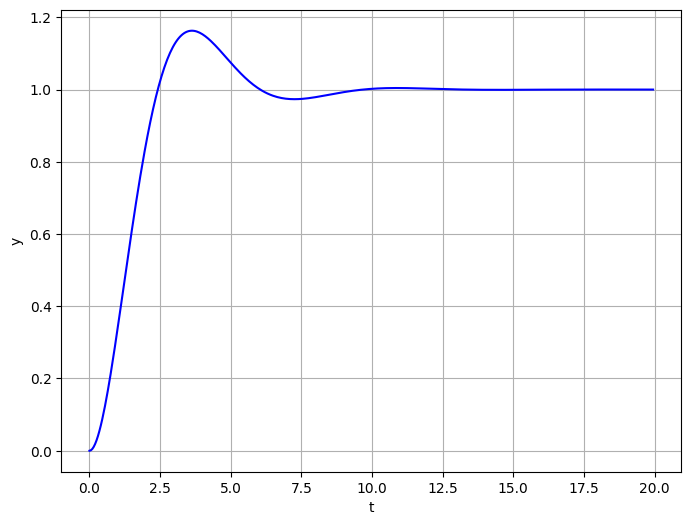

In [23]:
Tend = 20 # シミュレーションの終了時間
Tsim = np.arange(0,Tend,st) # シミュレーション時間の定義
y, t = step(sys,Tsim) # 引数はモデルとシミュレーション時間，返り値は出力応答と時間
# ステップ応答の描画 
plt.figure(figsize = (8,6)) 
plt.plot(t,y,c = "blue") 
plt.grid()
plt.xlabel("t") 
plt.ylabel("y") 
plt.show()


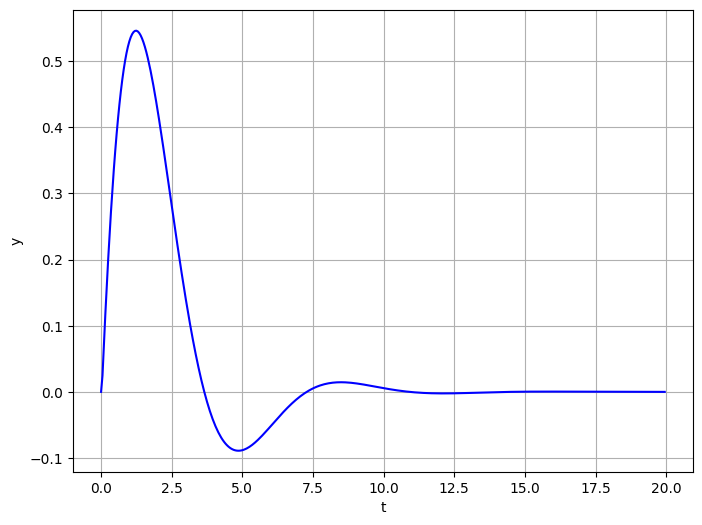

In [18]:
Tend = 20 # シミュレーションの終了時間
Tsim = np.arange(0,Tend,st) # シミュレーション時間の定義
y, t = impulse(sys,Tsim) # 引数はモデルとシミュレーション時間，返り値は出力応答と時間
# ステップ応答の描画 
plt.figure(figsize = (8,6)) 
plt.plot(t,y,c = "blue") 
plt.grid()
plt.xlabel("t") 
plt.ylabel("y") 
plt.show()

In [20]:

x = np.array([[0], [0]]) # 初期状態 
u = 1.0 # ステップ信号
y_data = [] # 出力値を保存 
t_data = [] # 時間を保存
for t in np.arange(0,Tend,st):
    y = C @ x + D * u # 出力方程式
    x = A @ x + B * u # 状態方程式 
    y_data.append(y[0,0]) # データへの格納
    t_data.append(t)

In [22]:
x = np.array([[0], [0]]) # 初期状態 
u = 1.0 # ステップ信号
x1_data = [] # 状態1を保存 
x2_data = [] # 状態2を保存 
u_data = [] # 入力を保存 
t_data = [] # 時間を保存
for t in np.arange(0,Tend,st): 
    x1_data.append(x[0,0]) # データへの格納 
    x2_data.append(x[1,0])
    u_data.append(u)
    t_data.append(t)
    x = A @ x + B * u # 状態方程式による状態の更新